In [20]:
import pandas as pd
import numpy as np

stock_prices = {}
with open('prices.txt', 'r') as f:
    lines = f.readlines()
    for i in range(len(lines)):
        row = lines[i].strip().split(' ')
        row = [x for x in row if x !='']
        for j in range(len(row)):
            if j in stock_prices:
                stock_prices[j].append(float(row[j]))
            else:
                stock_prices[j] = [float(row[j])]
stock_prices = pd.DataFrame(stock_prices)

<Axes: title={'center': 'Cumulative Returns of Stocks'}>

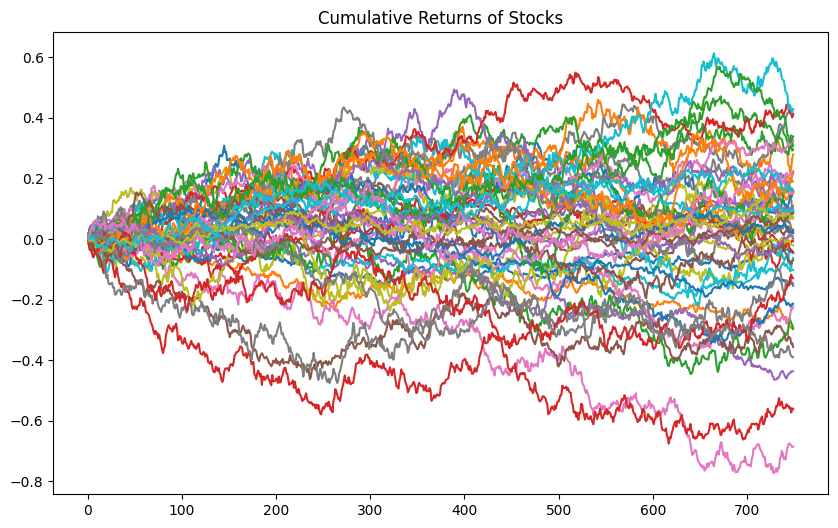

In [26]:
# plot stock cumulative returns
stock_cum_returns = stock_prices.pct_change().cumsum()
stock_cum_returns.plot(title='Cumulative Returns of Stocks', figsize=(10, 6), legend=False)


<Axes: title={'center': 'Average Cumulative Returns of Stocks'}>

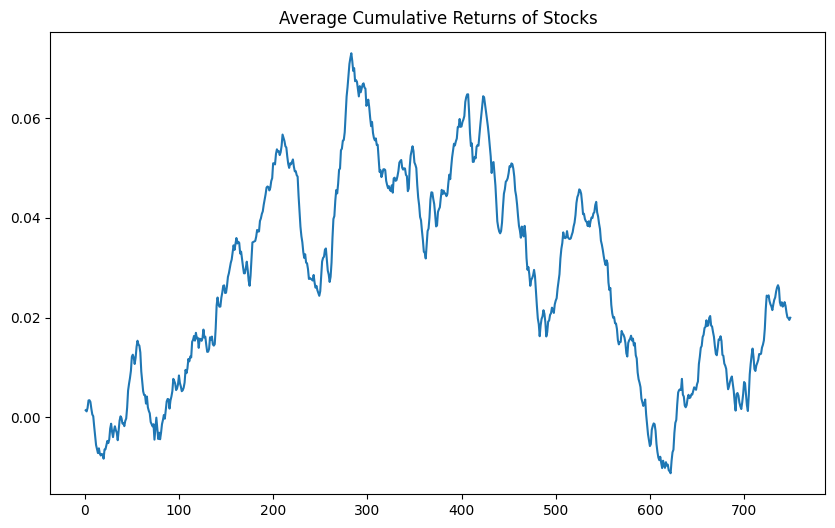

In [27]:
# plot average stock cum returns
stock_avg_cum_returns = stock_cum_returns.mean(axis=1)
stock_avg_cum_returns.plot(title='Average Cumulative Returns of Stocks', figsize=(10, 6), legend=False)


In [33]:
def pos_returns(returns, period):
    """
    return number of stocks with positive returns in a given period
    """
    if period <= 0:
        raise ValueError("Period must be a positive integer")
    if period > len(returns):
        raise ValueError("Period exceeds the length of returns data")
    
    return (returns.iloc[-period:] > 0).sum(axis=1).iloc[-1]  # Count positive returns in the last 'period' days
pos_returns_count = pos_returns(stock_prices.pct_change(), 750)
pos_returns_count / len(stock_prices.columns) * 100  # Convert to percentage    


52.0

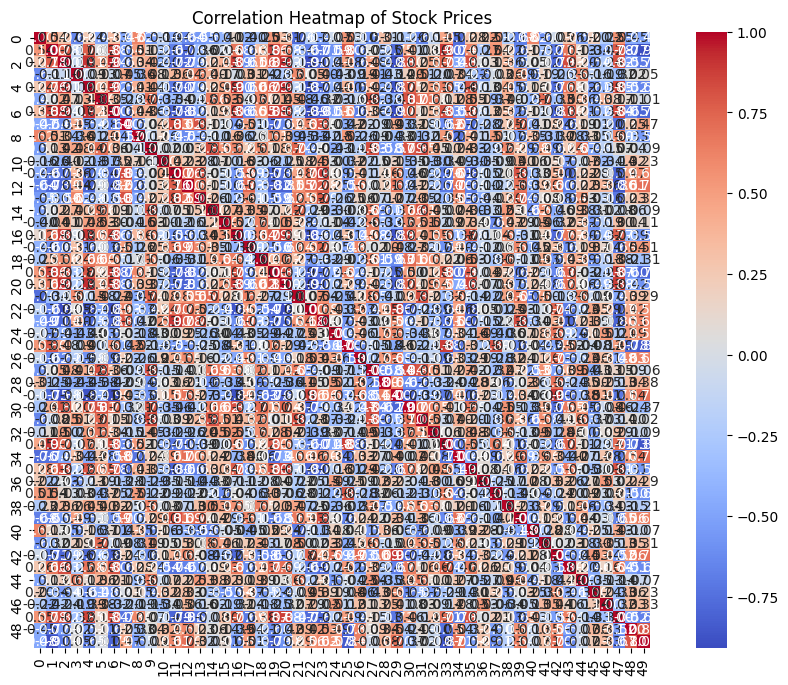

In [39]:
# plot correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = stock_prices.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Stock Prices')
plt.show()


In [40]:
# find high correlation pairs
def high_correlation_pairs(corr_matrix, threshold=0.8):
    """
    Find pairs of stocks with correlation above a given threshold.
    """
    pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
    return pd.DataFrame(pairs, columns=['Stock 1', 'Stock 2', 'Correlation'])
high_corr_pairs = high_correlation_pairs(correlation_matrix, threshold=0.8)
print("High Correlation Pairs:")
print(high_corr_pairs)

High Correlation Pairs:
    Stock 1  Stock 2  Correlation
0         1        6     0.879135
1         1       19     0.864636
2         1       33     0.899330
3         1       49    -0.906795
4         2        4     0.906367
..      ...      ...          ...
64       27       31     0.800677
65       29       42     0.897304
66       33       49    -0.866320
67       35       47     0.812869
68       48       49     0.801410

[69 rows x 3 columns]


In [ ]:
high_corr_pairs.to_csv('high_correlation_pairs.csv', index=False)

In [ ]:
pairs = high_corr_pairs[['Stock 1', 'Stock 2']].values.tolist()
pairs = [tuple(sorted(pair)) for pair in pairs]  # Sort pairs to avoid duplicates
pairs

[(1, 6),
 (1, 19),
 (1, 33),
 (1, 49),
 (2, 4),
 (2, 6),
 (2, 16),
 (2, 19),
 (2, 20),
 (2, 22),
 (2, 29),
 (2, 35),
 (2, 43),
 (2, 47),
 (4, 6),
 (4, 16),
 (4, 20),
 (4, 22),
 (4, 29),
 (4, 35),
 (4, 47),
 (5, 27),
 (5, 30),
 (6, 12),
 (6, 16),
 (6, 19),
 (6, 20),
 (6, 22),
 (6, 23),
 (6, 29),
 (6, 33),
 (6, 42),
 (6, 43),
 (6, 47),
 (7, 11),
 (7, 13),
 (9, 14),
 (9, 27),
 (9, 31),
 (11, 13),
 (11, 23),
 (11, 39),
 (12, 19),
 (12, 20),
 (12, 47),
 (14, 31),
 (16, 20),
 (16, 22),
 (16, 29),
 (16, 30),
 (19, 20),
 (19, 47),
 (20, 22),
 (20, 29),
 (20, 35),
 (20, 47),
 (21, 31),
 (22, 29),
 (22, 35),
 (23, 39),
 (23, 47),
 (25, 33),
 (25, 49),
 (27, 30),
 (27, 31),
 (29, 42),
 (33, 49),
 (35, 47),
 (48, 49)]

<Figure size 1000x600 with 0 Axes>

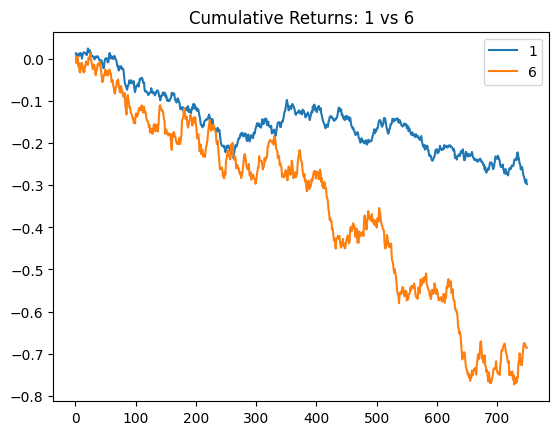

<Figure size 1000x600 with 0 Axes>

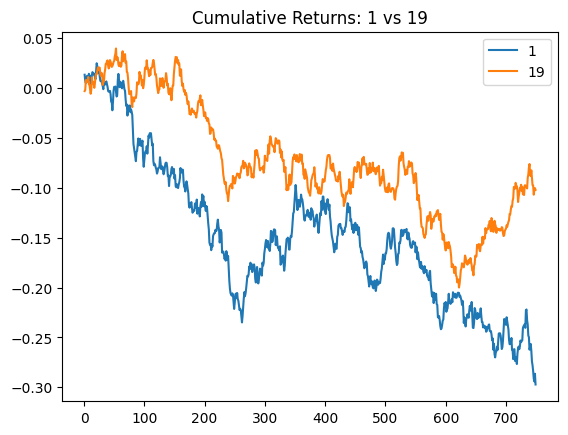

<Figure size 1000x600 with 0 Axes>

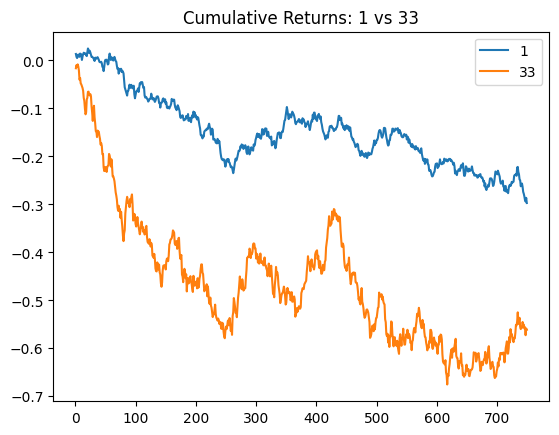

<Figure size 1000x600 with 0 Axes>

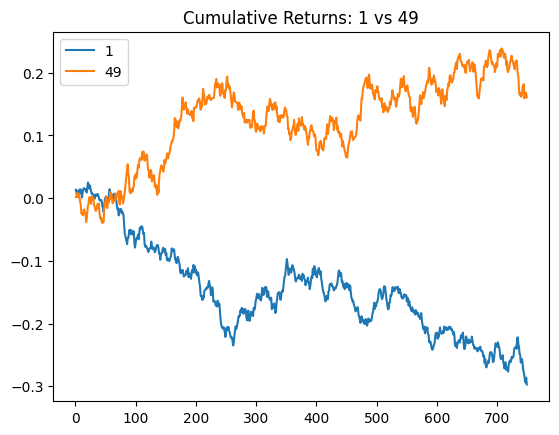

<Figure size 1000x600 with 0 Axes>

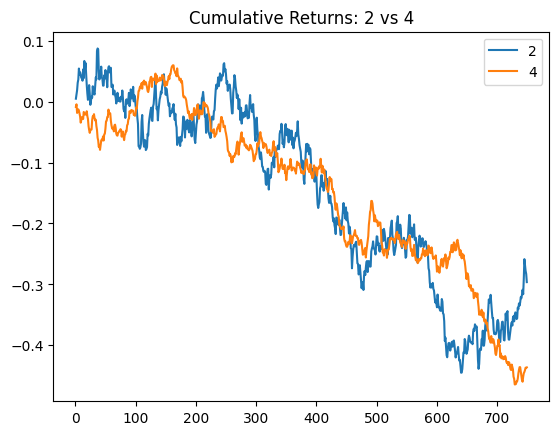

<Figure size 1000x600 with 0 Axes>

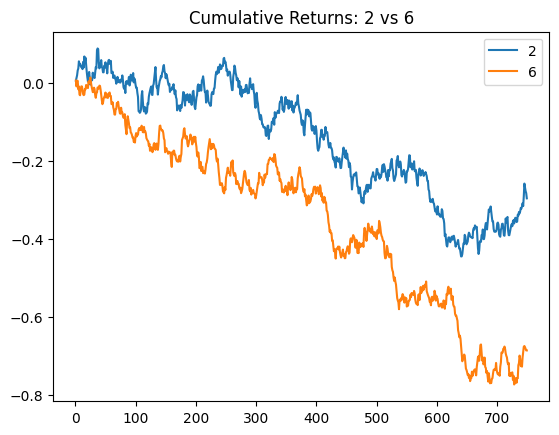

<Figure size 1000x600 with 0 Axes>

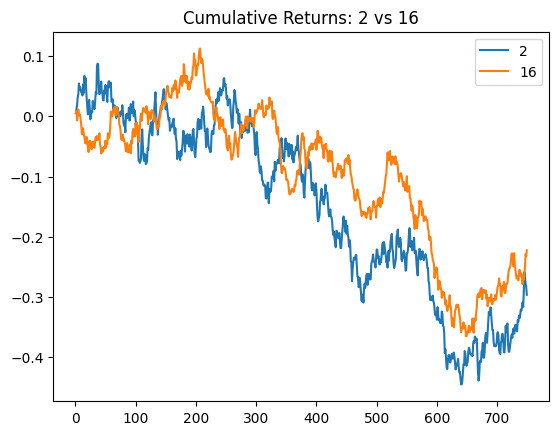

<Figure size 1000x600 with 0 Axes>

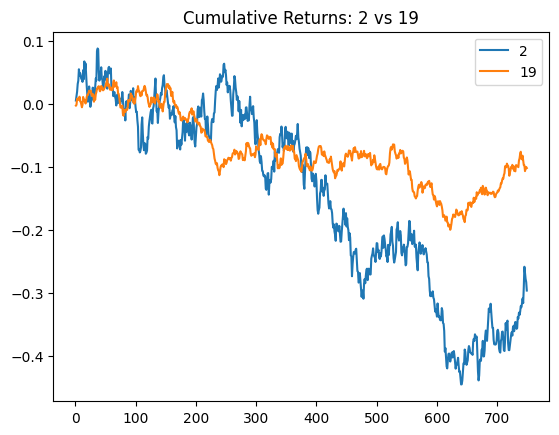

<Figure size 1000x600 with 0 Axes>

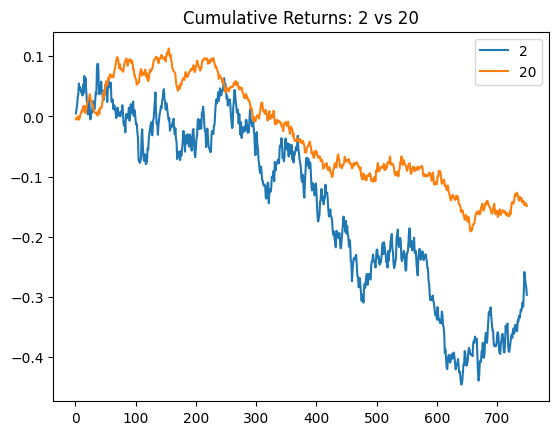

<Figure size 1000x600 with 0 Axes>

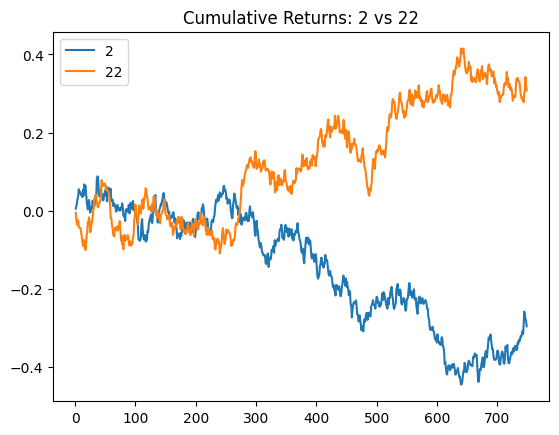

<Figure size 1000x600 with 0 Axes>

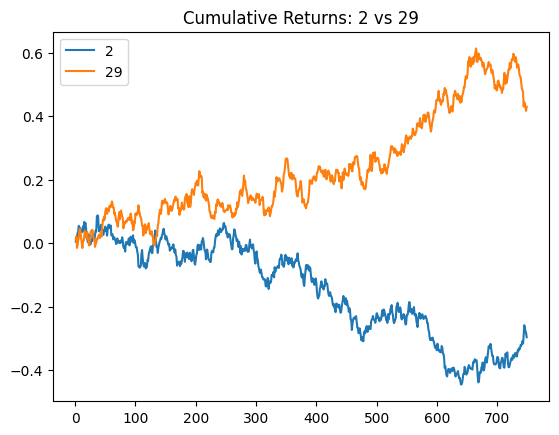

<Figure size 1000x600 with 0 Axes>

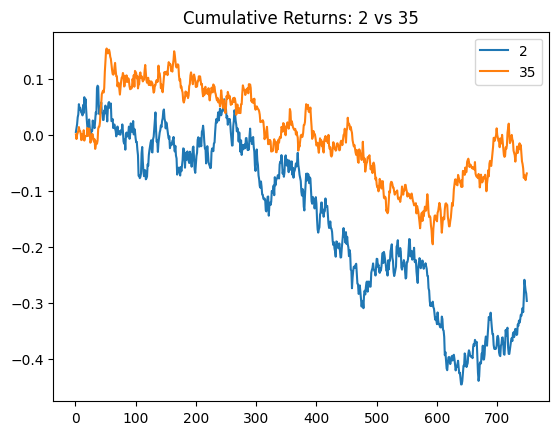

<Figure size 1000x600 with 0 Axes>

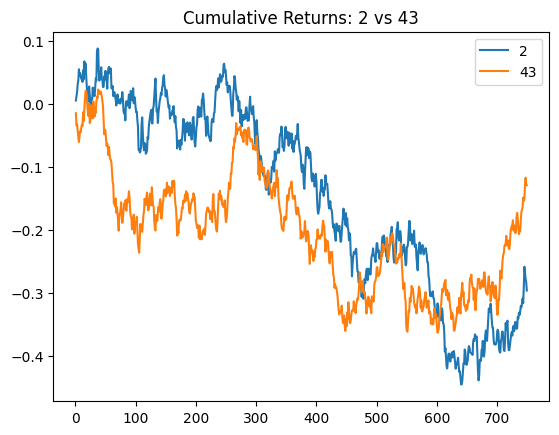

<Figure size 1000x600 with 0 Axes>

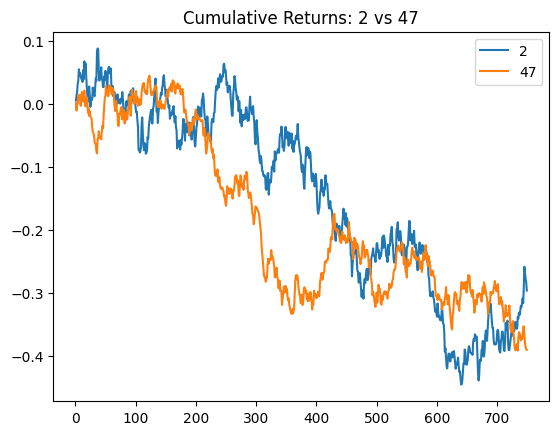

<Figure size 1000x600 with 0 Axes>

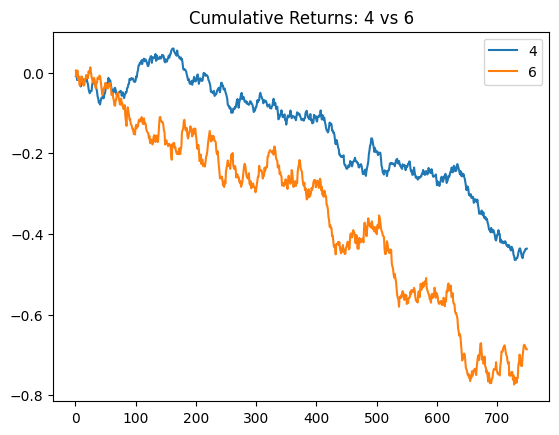

<Figure size 1000x600 with 0 Axes>

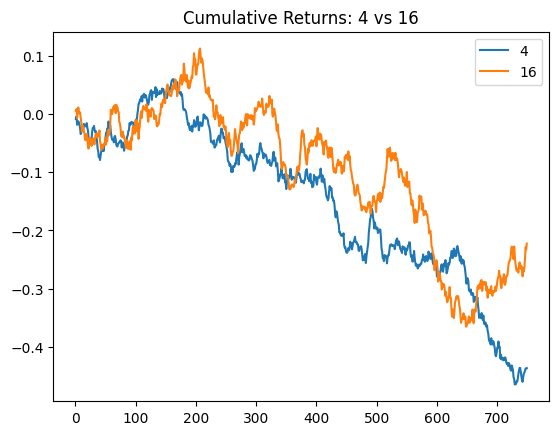

<Figure size 1000x600 with 0 Axes>

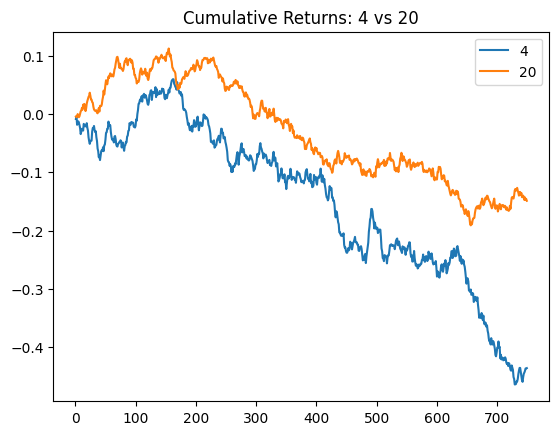

<Figure size 1000x600 with 0 Axes>

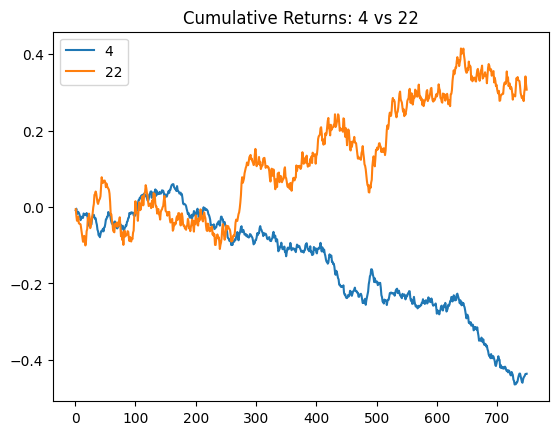

<Figure size 1000x600 with 0 Axes>

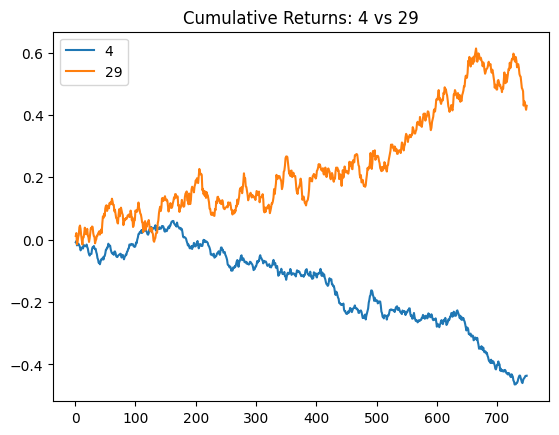

<Figure size 1000x600 with 0 Axes>

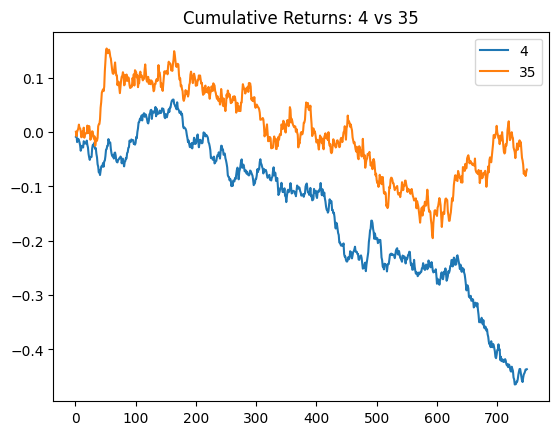

<Figure size 1000x600 with 0 Axes>

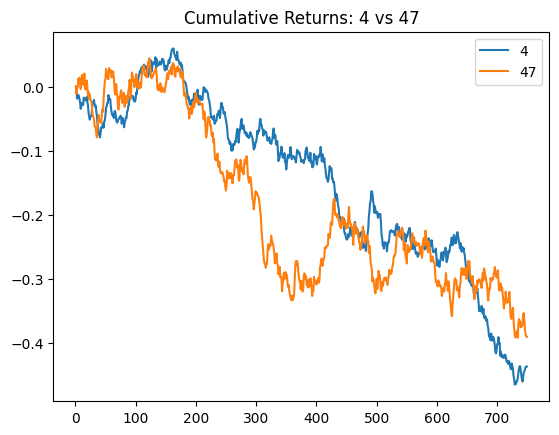

<Figure size 1000x600 with 0 Axes>

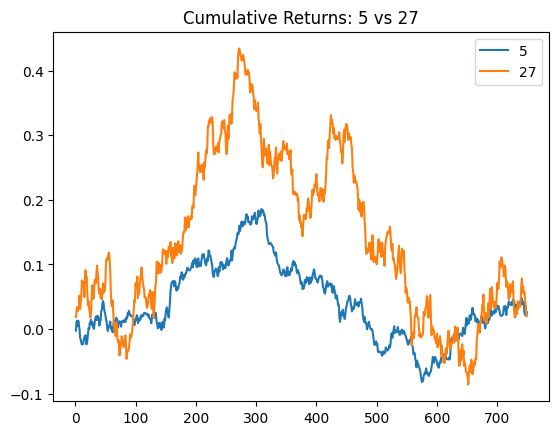

<Figure size 1000x600 with 0 Axes>

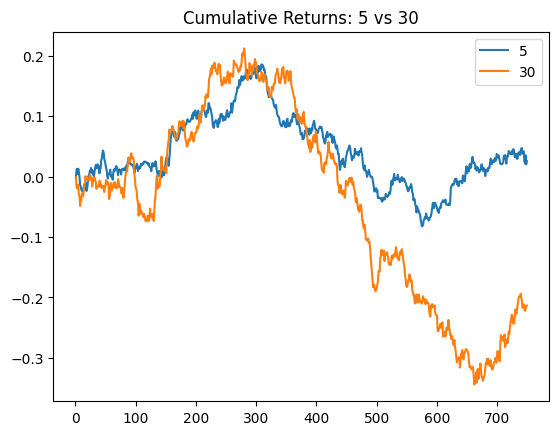

<Figure size 1000x600 with 0 Axes>

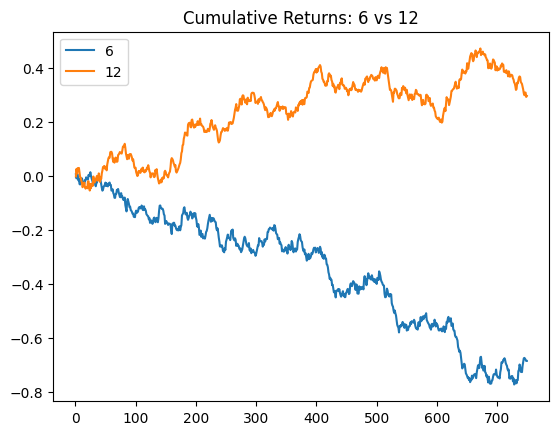

<Figure size 1000x600 with 0 Axes>

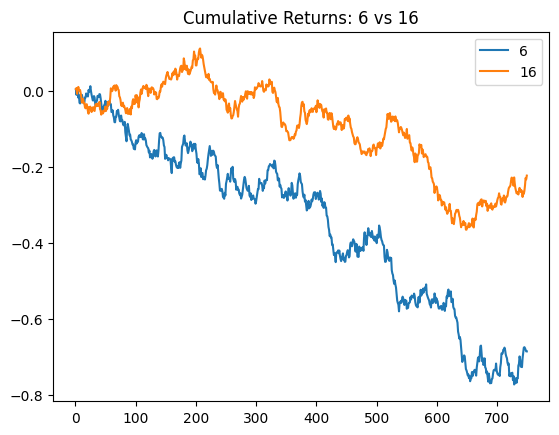

<Figure size 1000x600 with 0 Axes>

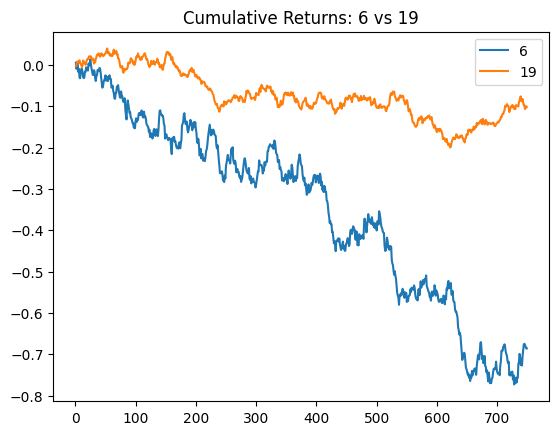

<Figure size 1000x600 with 0 Axes>

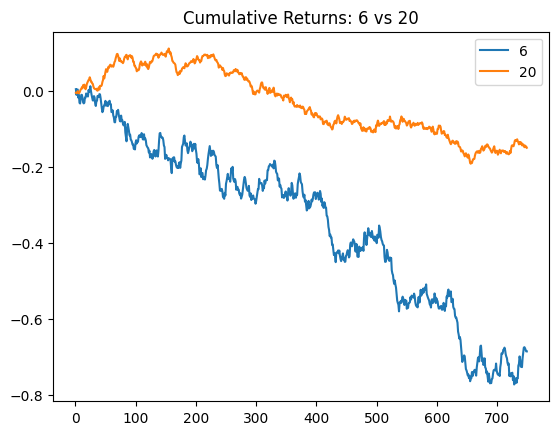

<Figure size 1000x600 with 0 Axes>

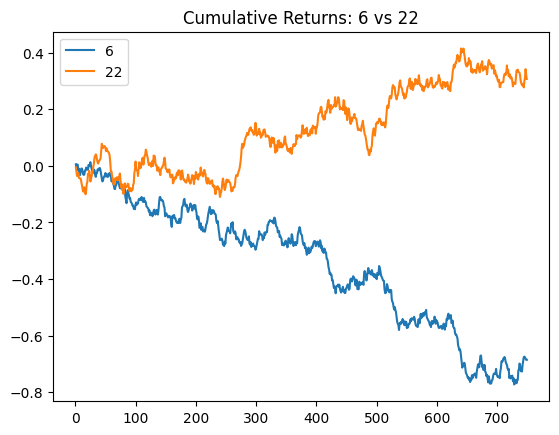

<Figure size 1000x600 with 0 Axes>

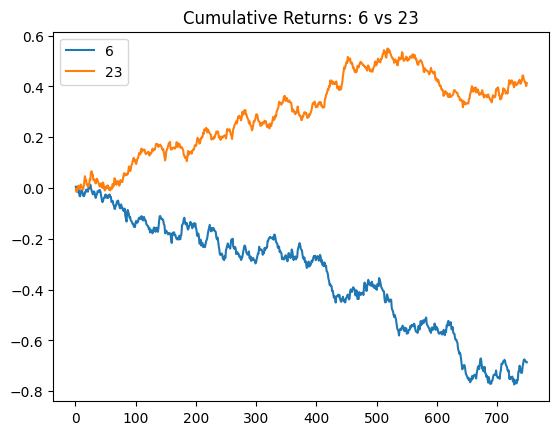

<Figure size 1000x600 with 0 Axes>

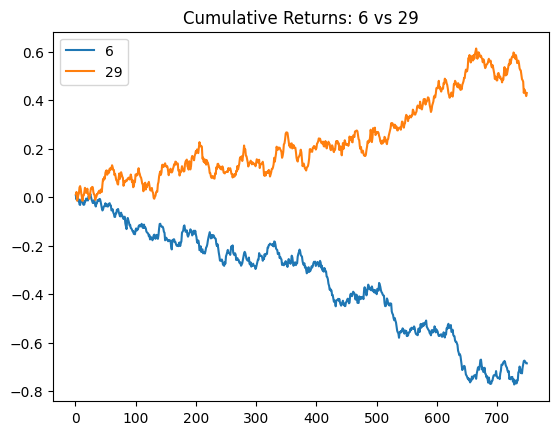

<Figure size 1000x600 with 0 Axes>

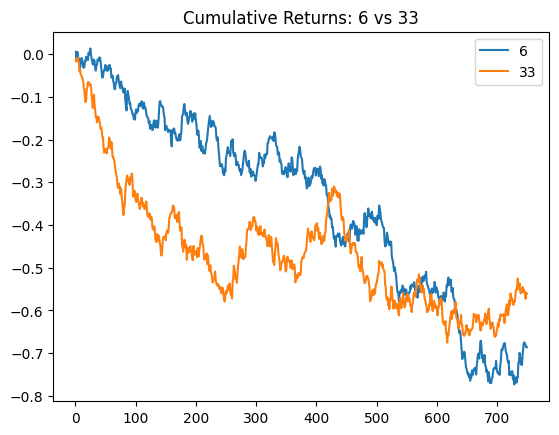

<Figure size 1000x600 with 0 Axes>

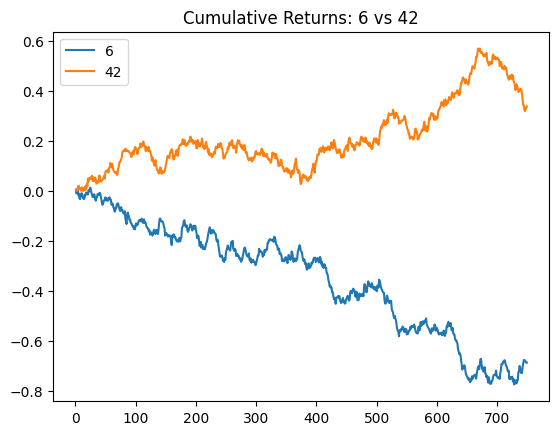

<Figure size 1000x600 with 0 Axes>

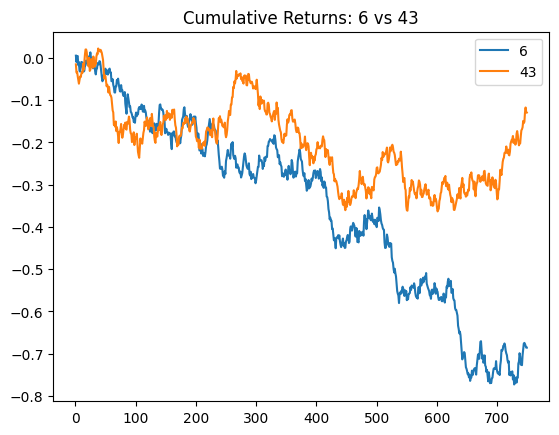

<Figure size 1000x600 with 0 Axes>

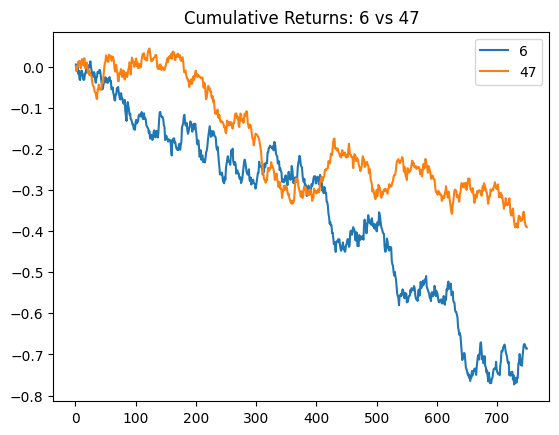

<Figure size 1000x600 with 0 Axes>

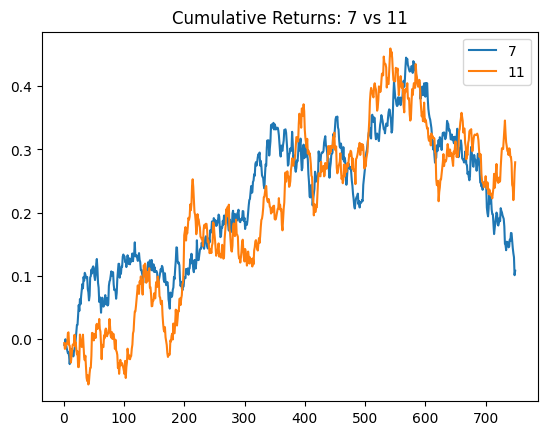

<Figure size 1000x600 with 0 Axes>

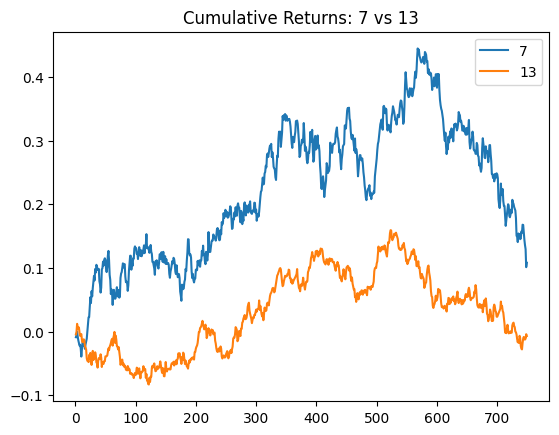

<Figure size 1000x600 with 0 Axes>

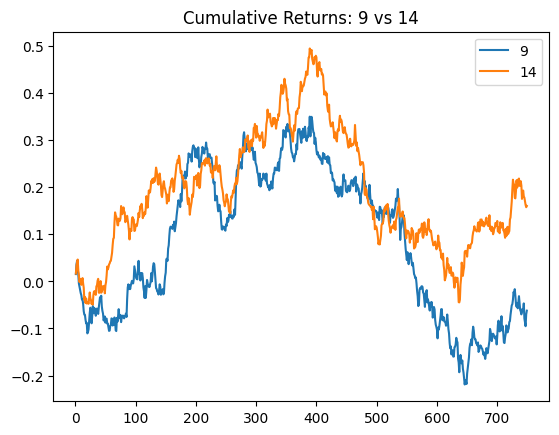

<Figure size 1000x600 with 0 Axes>

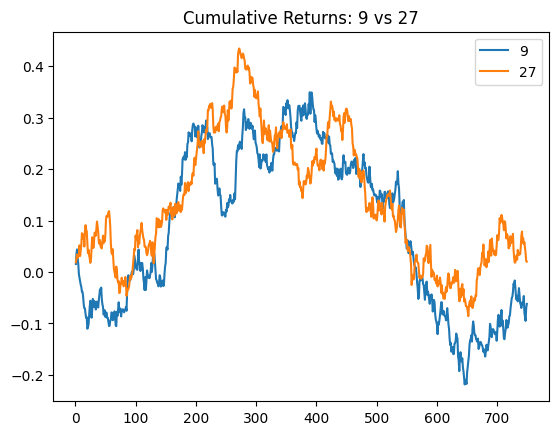

<Figure size 1000x600 with 0 Axes>

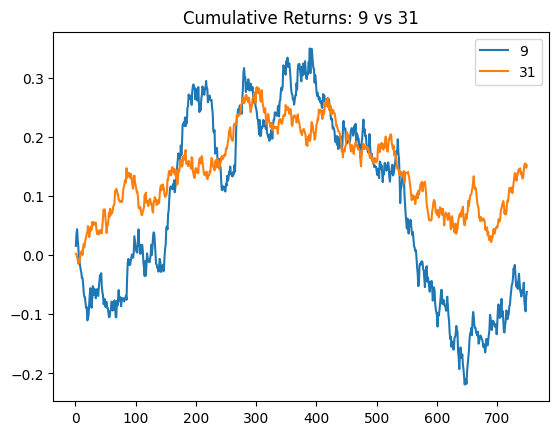

<Figure size 1000x600 with 0 Axes>

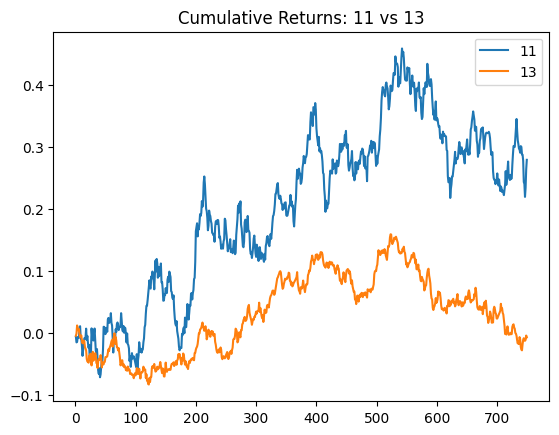

<Figure size 1000x600 with 0 Axes>

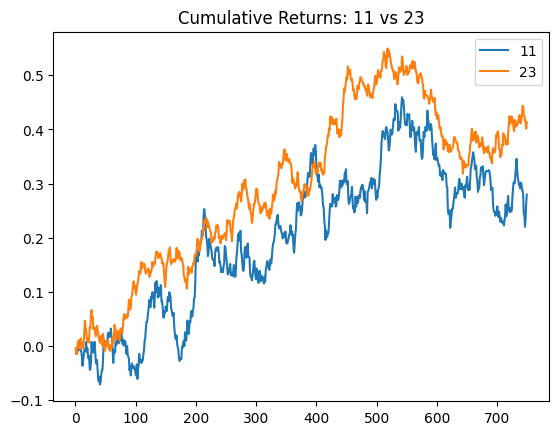

<Figure size 1000x600 with 0 Axes>

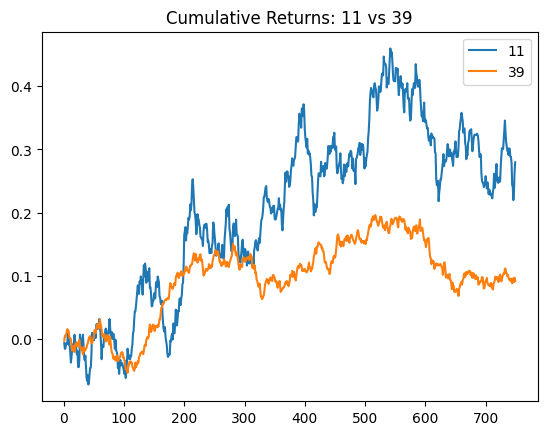

<Figure size 1000x600 with 0 Axes>

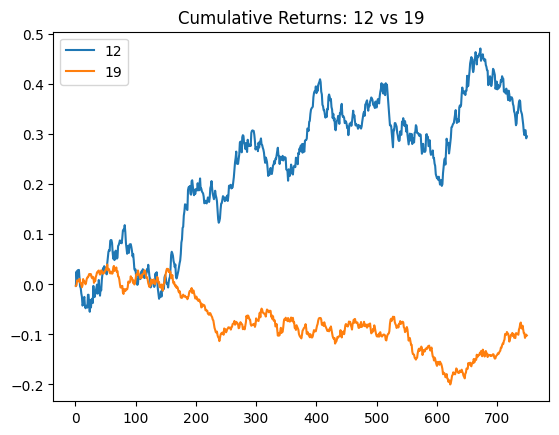

<Figure size 1000x600 with 0 Axes>

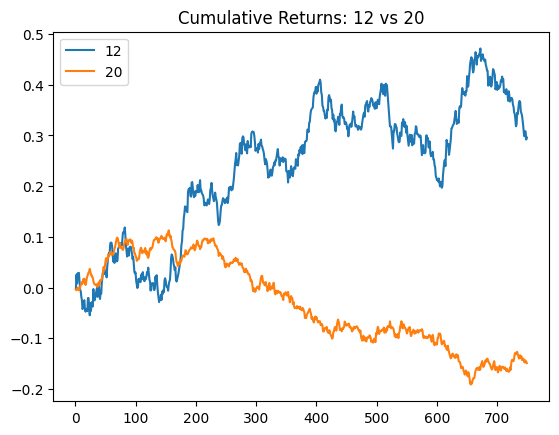

<Figure size 1000x600 with 0 Axes>

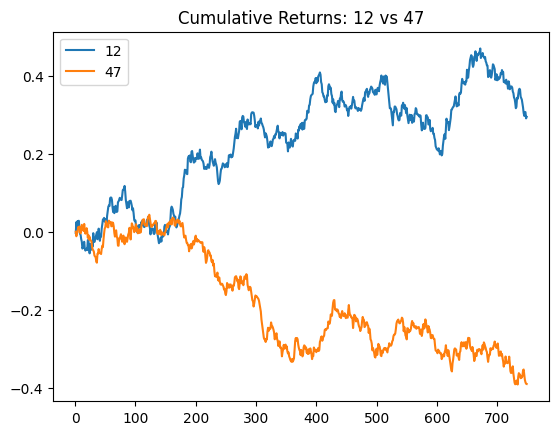

<Figure size 1000x600 with 0 Axes>

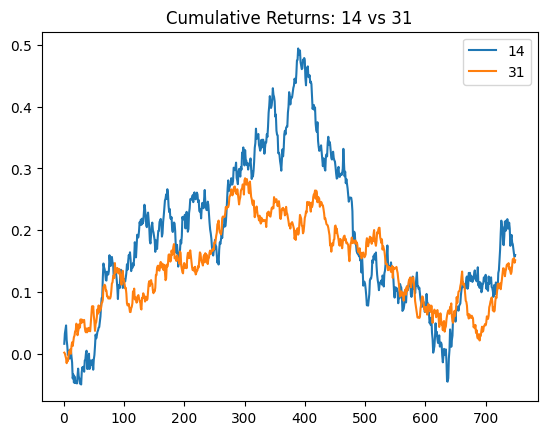

<Figure size 1000x600 with 0 Axes>

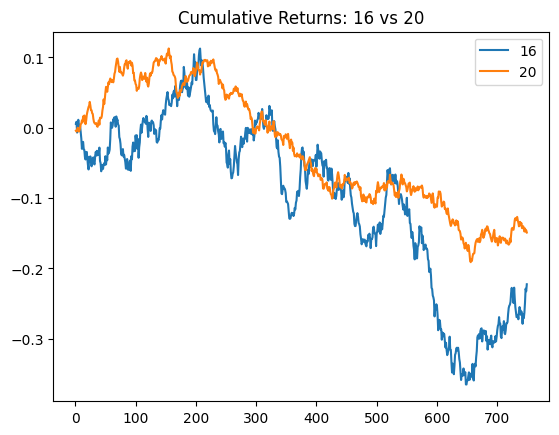

<Figure size 1000x600 with 0 Axes>

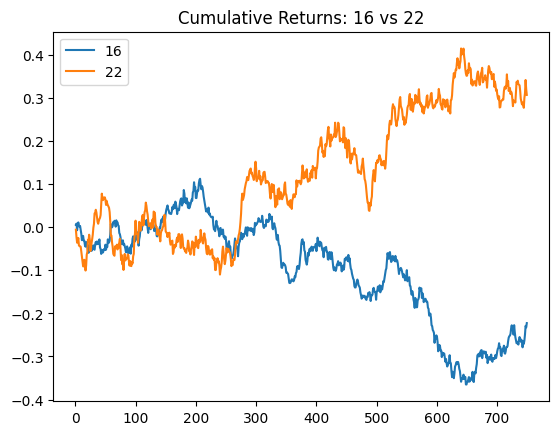

<Figure size 1000x600 with 0 Axes>

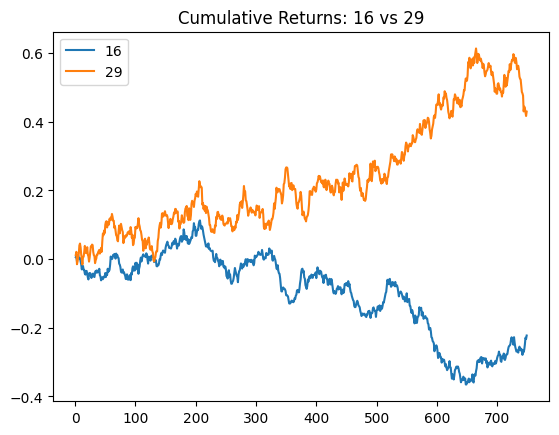

<Figure size 1000x600 with 0 Axes>

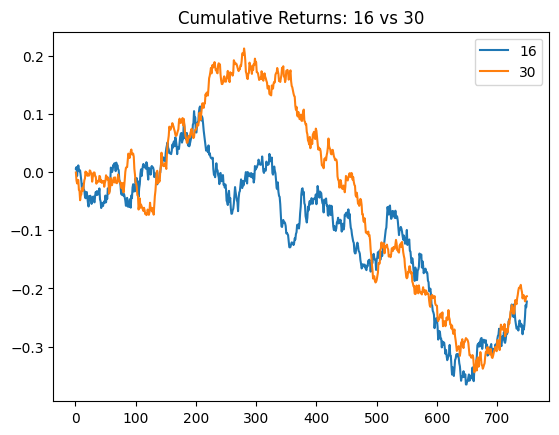

<Figure size 1000x600 with 0 Axes>

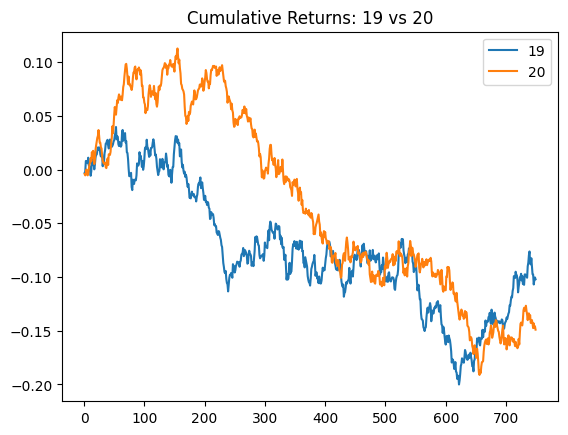

<Figure size 1000x600 with 0 Axes>

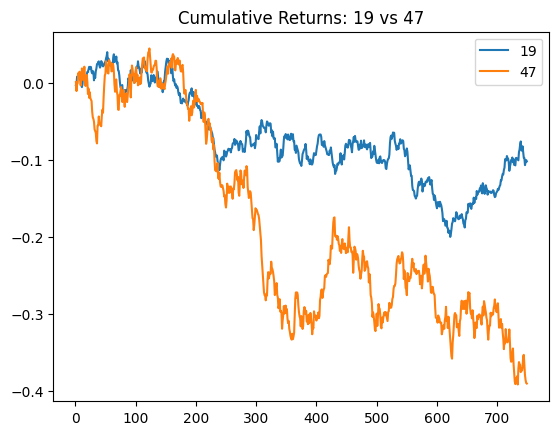

<Figure size 1000x600 with 0 Axes>

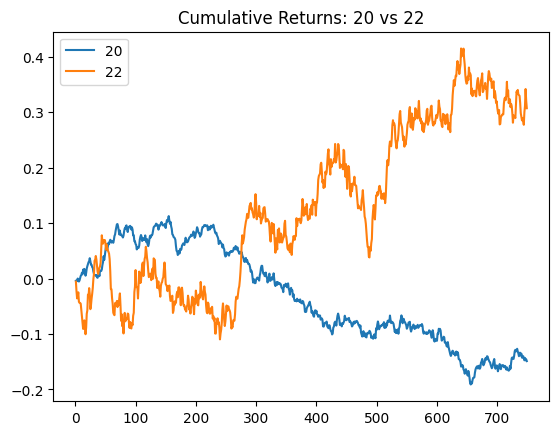

<Figure size 1000x600 with 0 Axes>

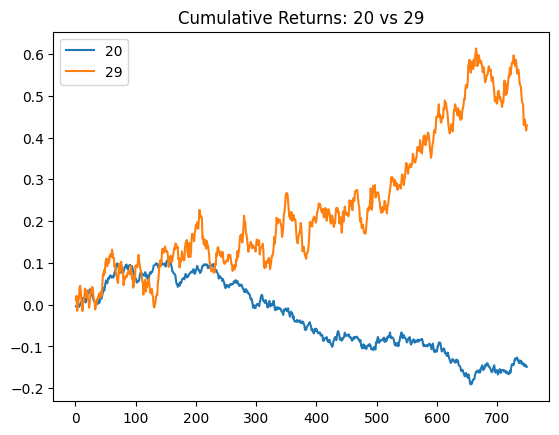

<Figure size 1000x600 with 0 Axes>

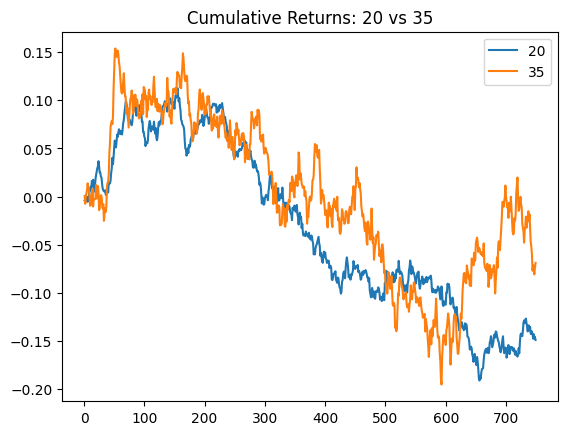

<Figure size 1000x600 with 0 Axes>

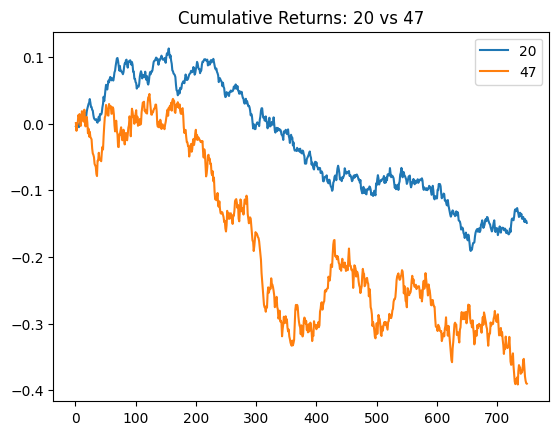

<Figure size 1000x600 with 0 Axes>

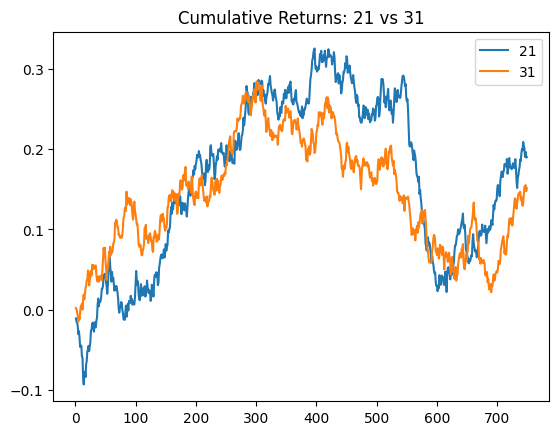

<Figure size 1000x600 with 0 Axes>

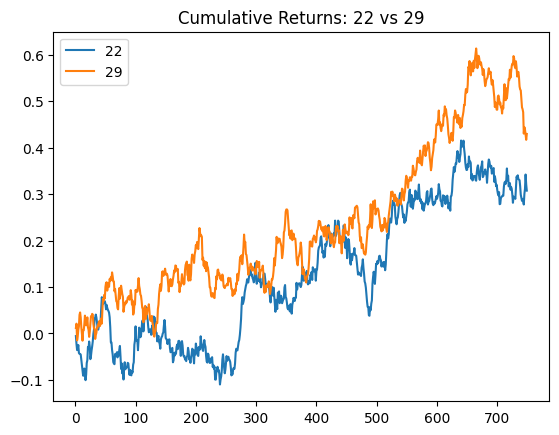

<Figure size 1000x600 with 0 Axes>

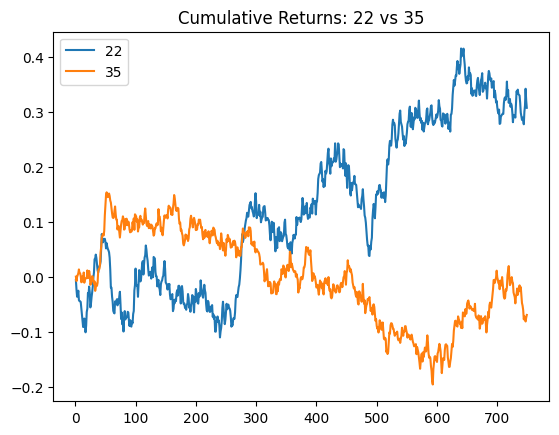

<Figure size 1000x600 with 0 Axes>

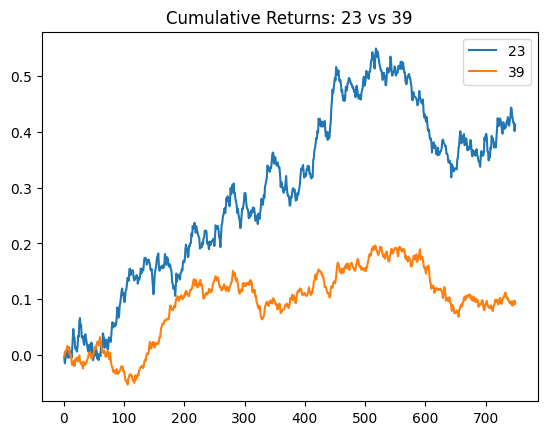

<Figure size 1000x600 with 0 Axes>

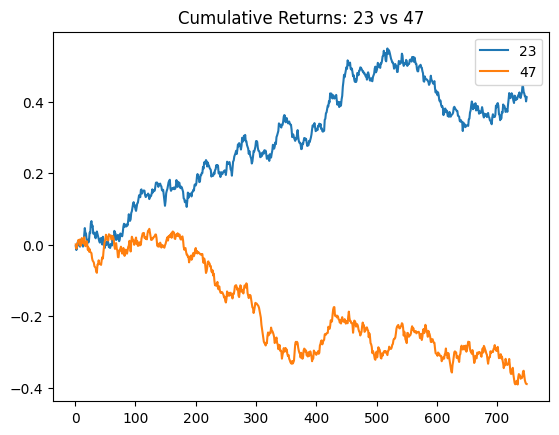

<Figure size 1000x600 with 0 Axes>

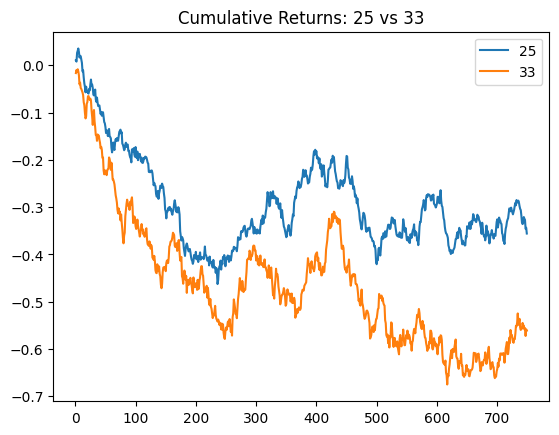

<Figure size 1000x600 with 0 Axes>

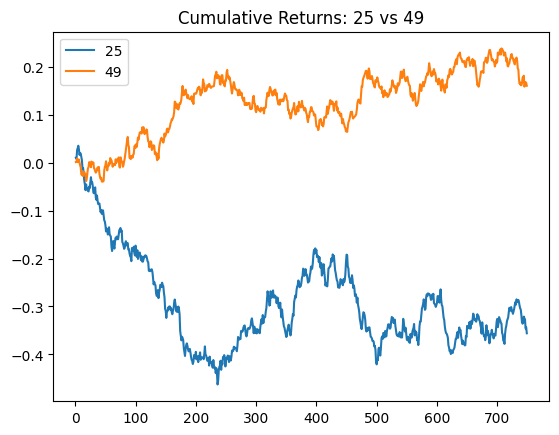

<Figure size 1000x600 with 0 Axes>

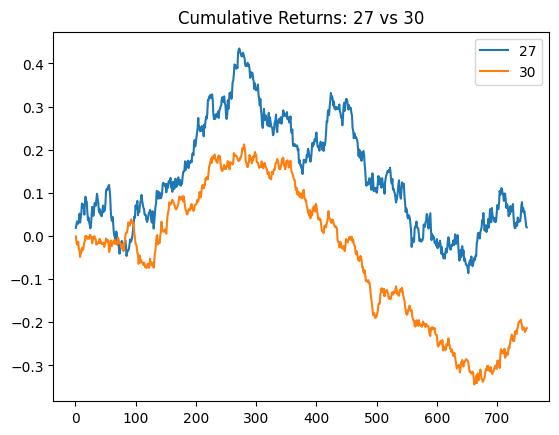

<Figure size 1000x600 with 0 Axes>

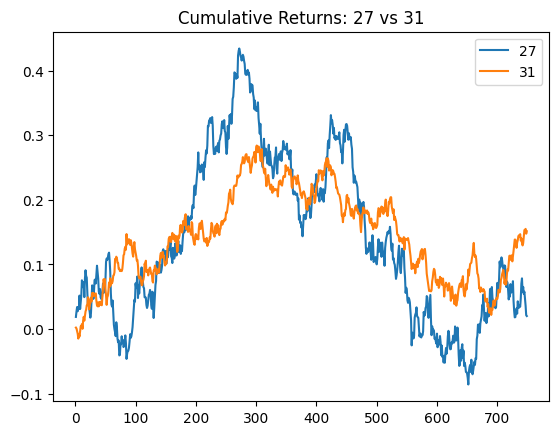

<Figure size 1000x600 with 0 Axes>

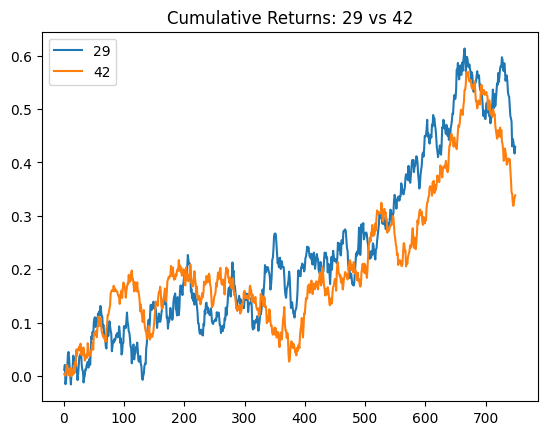

<Figure size 1000x600 with 0 Axes>

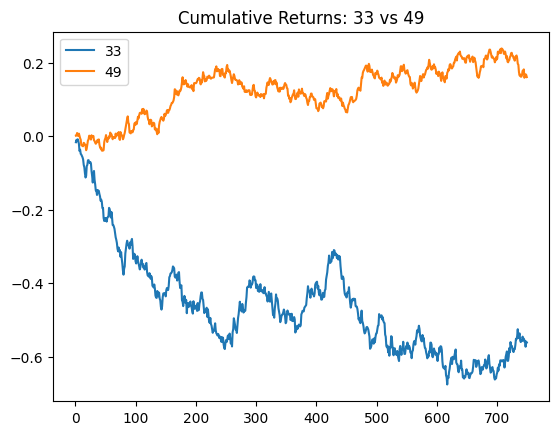

<Figure size 1000x600 with 0 Axes>

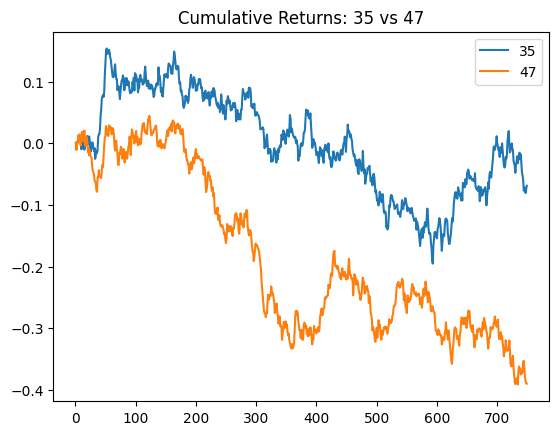

<Figure size 1000x600 with 0 Axes>

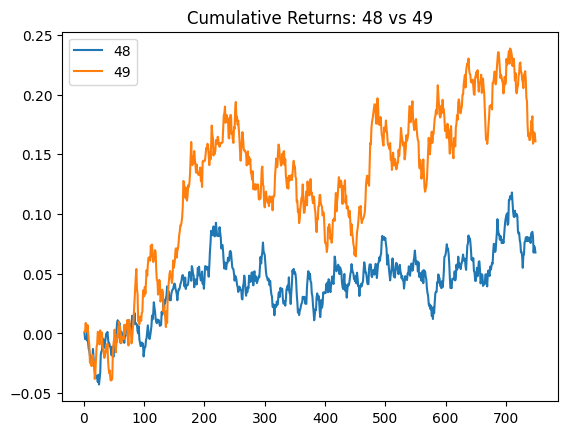

In [43]:
# plot stock cumulative returns for high correlation pairs
def plot_high_corr_pairs(stock_prices, pairs):
    """
    Plot cumulative returns for pairs of stocks with high correlation.
    """
    for stock1, stock2, _ in pairs.itertuples(index=False):
        plt.figure(figsize=(10, 6))
        stock_prices[[stock1, stock2]].pct_change().cumsum().plot(title=f'Cumulative Returns: {stock1} vs {stock2}')
        plt.legend([stock1, stock2])
        plt.show()
plot_high_corr_pairs(stock_prices, high_corr_pairs)
